# Phase 1 : Speed Bump Detection using pothole lab data

## Import Data

In [1]:
import pandas as pd
import numpy as np

import os

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [101]:
import json
  
# Opening JSON file
f = open('road-sb_200-mb_0-ph_0-min_10-1631207186.json',)
  
# returns JSON object as 
# a dictionary
data = json.load(f)

In [102]:
# data

In [103]:
df = pd.DataFrame({'rot_acc_x' : data['rot_acc_x'],
                  'rot_acc_y' : data['rot_acc_y'],
                  'rot_acc_z' : data['rot_acc_z']})
df

rot_acc_x  rot_acc_y  rot_acc_z
0          -0.131      0.179      9.748
1          -0.406     -0.291      9.944
2          -0.406     -0.213     10.415
3          -0.209     -0.056     10.493
4          -0.013     -0.095     10.336
...           ...        ...        ...
151197      0.509     -1.393     10.102
151198     -0.119     -1.825      8.611
151199     -0.393     -2.453     10.141
151200     -0.550     -3.433     11.357
151201     -0.432     -2.217     11.553

[151202 rows x 3 columns]

In [104]:
df.shape

(151202, 3)

In [105]:
temp = pd.DataFrame(columns=['index', 'speed'])
temp

Empty DataFrame
Columns: [index, speed]
Index: []

In [106]:
for dic in data['speed']:
    speed_df = pd.DataFrame({'index' : range(dic['start'], dic['end'] + 1),
                  'speed' : dic['speed']
                            })
    temp = pd.concat([temp, speed_df])
    temp.reset_index(drop = True, inplace = True)

temp

index   speed
0            0   5.760
1            1   5.760
2            2   5.760
3            3   5.760
4            4   5.760
...        ...     ...
151197  151197  14.148
151198  151198  14.148
151199  151199  14.148
151200  151200  14.148
151201  151201  14.148

[151202 rows x 2 columns]

In [107]:
df = pd.concat([temp, df], axis = 1)
df

index   speed  rot_acc_x  rot_acc_y  rot_acc_z
0            0   5.760     -0.131      0.179      9.748
1            1   5.760     -0.406     -0.291      9.944
2            2   5.760     -0.406     -0.213     10.415
3            3   5.760     -0.209     -0.056     10.493
4            4   5.760     -0.013     -0.095     10.336
...        ...     ...        ...        ...        ...
151197  151197  14.148      0.509     -1.393     10.102
151198  151198  14.148     -0.119     -1.825      8.611
151199  151199  14.148     -0.393     -2.453     10.141
151200  151200  14.148     -0.550     -3.433     11.357
151201  151201  14.148     -0.432     -2.217     11.553

[151202 rows x 5 columns]

In [108]:
temp = pd.DataFrame(columns=['index', 'tag'])
temp

Empty DataFrame
Columns: [index, tag]
Index: []

In [109]:
for dic in data['anomalies']:
    tag_df = pd.DataFrame({'index' : range(dic['start'], dic['end'] + 1),
                  'tag' : dic['type']
                            })
    temp = pd.concat([temp, tag_df])
    temp.reset_index(drop = True, inplace = True)

temp

index         tag
0         830  Speed bump
1         831  Speed bump
2         832  Speed bump
3         833  Speed bump
4         834  Speed bump
...       ...         ...
18549  150471  Speed bump
18550  150472  Speed bump
18551  150473  Speed bump
18552  150474  Speed bump
18553  150475  Speed bump

[18554 rows x 2 columns]

In [110]:
index_df = pd.DataFrame({'index' : range(0, df.shape[0])})
index_df

index
0            0
1            1
2            2
3            3
4            4
...        ...
151197  151197
151198  151198
151199  151199
151200  151200
151201  151201

[151202 rows x 1 columns]

In [111]:
tag_df = index_df.merge(temp, on='index', how = 'left')
tag_df = tag_df.fillna('Normal Road')

In [112]:
df = df.merge(tag_df, on='index')
df

index   speed  rot_acc_x  rot_acc_y  rot_acc_z          tag
0            0   5.760     -0.131      0.179      9.748  Normal Road
1            1   5.760     -0.406     -0.291      9.944  Normal Road
2            2   5.760     -0.406     -0.213     10.415  Normal Road
3            3   5.760     -0.209     -0.056     10.493  Normal Road
4            4   5.760     -0.013     -0.095     10.336  Normal Road
...        ...     ...        ...        ...        ...          ...
151197  151197  14.148      0.509     -1.393     10.102  Normal Road
151198  151198  14.148     -0.119     -1.825      8.611  Normal Road
151199  151199  14.148     -0.393     -2.453     10.141  Normal Road
151200  151200  14.148     -0.550     -3.433     11.357  Normal Road
151201  151201  14.148     -0.432     -2.217     11.553  Normal Road

[151202 rows x 6 columns]

In [113]:
temp = pd.DataFrame(columns=['index', 'vehicle', 'type', 'id'])
temp

Empty DataFrame
Columns: [index, vehicle, type, id]
Index: []

In [114]:
i = 0
id_ = 0
for dic in data['metadata']['samples']:
    vehicle_df = pd.DataFrame({'index' : range(i, i + dic['length']),
                               'vehicle' : dic['vehicle'],
                               'type' : dic['type'],
                               'id_' : id_
                            })
    temp = pd.concat([temp, vehicle_df])
    temp.reset_index(drop = True, inplace = True)
    i = i + dic['length']
    id_ = id_ + 1

temp

index          vehicle    type   id    id_
0            0   Toyota Corolla  Normal  NaN    0.0
1            1   Toyota Corolla  Normal  NaN    0.0
2            2   Toyota Corolla  Normal  NaN    0.0
3            3   Toyota Corolla  Normal  NaN    0.0
4            4   Toyota Corolla  Normal  NaN    0.0
...        ...              ...     ...  ...    ...
151197  151197  Chevrolet Chevy  Normal  NaN  626.0
151198  151198  Chevrolet Chevy  Normal  NaN  626.0
151199  151199  Chevrolet Chevy  Normal  NaN  626.0
151200  151200  Chevrolet Chevy  Normal  NaN  626.0
151201  151201  Chevrolet Chevy  Normal  NaN  626.0

[151202 rows x 5 columns]

In [115]:
df = df.merge(temp, on='index')
df

index   speed  rot_acc_x  rot_acc_y  rot_acc_z          tag  \
0            0   5.760     -0.131      0.179      9.748  Normal Road   
1            1   5.760     -0.406     -0.291      9.944  Normal Road   
2            2   5.760     -0.406     -0.213     10.415  Normal Road   
3            3   5.760     -0.209     -0.056     10.493  Normal Road   
4            4   5.760     -0.013     -0.095     10.336  Normal Road   
...        ...     ...        ...        ...        ...          ...   
151197  151197  14.148      0.509     -1.393     10.102  Normal Road   
151198  151198  14.148     -0.119     -1.825      8.611  Normal Road   
151199  151199  14.148     -0.393     -2.453     10.141  Normal Road   
151200  151200  14.148     -0.550     -3.433     11.357  Normal Road   
151201  151201  14.148     -0.432     -2.217     11.553  Normal Road   

                vehicle    type   id    id_  
0        Toyota Corolla  Normal  NaN    0.0  
1        Toyota Corolla  Normal  NaN    0.0  
2        Toyota Corolla  Normal  NaN    0.0  
3        Toyota Corolla  Normal  NaN    0.0  
4        Toyota Corolla  Normal  NaN    0.0  
...                 ...     ...  ...    ...  
151197  Chevrolet Chevy  Normal  NaN  626.0  
151198  Chevrolet Chevy  Normal  NaN  626.0  
151199  Chevrolet Chevy  Normal  NaN  626.0  
151200  Chevrolet Chevy  Normal  NaN  626.0  
151201  Chevrolet Chevy  Normal  NaN  626.0  

[151202 rows x 10 columns]

In [116]:
df.to_csv('master_df.csv', index = False)

## Data Preprocessing

In [117]:
df = pd.read_csv('master_df.csv')
df

index   speed  rot_acc_x  rot_acc_y  rot_acc_z          tag  \
0            0   5.760     -0.131      0.179      9.748  Normal Road   
1            1   5.760     -0.406     -0.291      9.944  Normal Road   
2            2   5.760     -0.406     -0.213     10.415  Normal Road   
3            3   5.760     -0.209     -0.056     10.493  Normal Road   
4            4   5.760     -0.013     -0.095     10.336  Normal Road   
...        ...     ...        ...        ...        ...          ...   
151197  151197  14.148      0.509     -1.393     10.102  Normal Road   
151198  151198  14.148     -0.119     -1.825      8.611  Normal Road   
151199  151199  14.148     -0.393     -2.453     10.141  Normal Road   
151200  151200  14.148     -0.550     -3.433     11.357  Normal Road   
151201  151201  14.148     -0.432     -2.217     11.553  Normal Road   

                vehicle    type  id    id_  
0        Toyota Corolla  Normal NaN    0.0  
1        Toyota Corolla  Normal NaN    0.0  
2        Toyota Corolla  Normal NaN    0.0  
3        Toyota Corolla  Normal NaN    0.0  
4        Toyota Corolla  Normal NaN    0.0  
...                 ...     ...  ..    ...  
151197  Chevrolet Chevy  Normal NaN  626.0  
151198  Chevrolet Chevy  Normal NaN  626.0  
151199  Chevrolet Chevy  Normal NaN  626.0  
151200  Chevrolet Chevy  Normal NaN  626.0  
151201  Chevrolet Chevy  Normal NaN  626.0  

[151202 rows x 10 columns]

In [118]:
df['tag'].value_counts()

Normal Road    132648
Speed bump      18554
Name: tag, dtype: int64

In [119]:
df['vehicle'].value_counts()

Chevrolet Chevy       48360
Nissan Small Truck    32820
VW Jetta              26505
Chevrolet S10         25809
Toyota Corolla        17708
Name: vehicle, dtype: int64

In [120]:
df[['vehicle', 'tag']].drop_duplicates()

vehicle          tag
0         Toyota Corolla  Normal Road
271      Chevrolet Chevy  Normal Road
830       Toyota Corolla   Speed bump
1675  Nissan Small Truck  Normal Road
2320            VW Jetta  Normal Road
2969            VW Jetta   Speed bump
4976     Chevrolet Chevy   Speed bump
6429       Chevrolet S10  Normal Road
7556  Nissan Small Truck   Speed bump
8473       Chevrolet S10   Speed bump

In [121]:
df = df.loc[df.vehicle == 'Chevrolet Chevy', :]
df.reset_index(drop = True, inplace = True)

In [122]:
df['tag'].value_counts()

Normal Road    43754
Speed bump      4606
Name: tag, dtype: int64

In [123]:
master_df = df[['index', 'speed', 'rot_acc_x', 'rot_acc_y', 'rot_acc_z', 'id_']]

In [124]:
ytrue = [1 if x == 'Normal' else 0 for x in df[['id_', 'type']].drop_duplicates().reset_index(drop = True)['type']]

## Feature Engineering

In [125]:
from tsfresh import extract_features
extracted_features = extract_features(master_df, column_id="id_", column_sort="index")

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 20/20 [01:20<00:00,  4.04s/it]


In [126]:
extracted_features.columns

Index(['rot_acc_z__variance_larger_than_standard_deviation',
       'rot_acc_z__has_duplicate_max', 'rot_acc_z__has_duplicate_min',
       'rot_acc_z__has_duplicate', 'rot_acc_z__sum_values',
       'rot_acc_z__abs_energy', 'rot_acc_z__mean_abs_change',
       'rot_acc_z__mean_change', 'rot_acc_z__mean_second_derivative_central',
       'rot_acc_z__median',
       ...
       'rot_acc_y__permutation_entropy__dimension_5__tau_1',
       'rot_acc_y__permutation_entropy__dimension_6__tau_1',
       'rot_acc_y__permutation_entropy__dimension_7__tau_1',
       'rot_acc_y__query_similarity_count__query_None__threshold_0.0',
       'rot_acc_y__matrix_profile__feature_"min"__threshold_0.98',
       'rot_acc_y__matrix_profile__feature_"max"__threshold_0.98',
       'rot_acc_y__matrix_profile__feature_"mean"__threshold_0.98',
       'rot_acc_y__matrix_profile__feature_"median"__threshold_0.98',
       'rot_acc_y__matrix_profile__feature_"25"__threshold_0.98',
       'rot_acc_y__matrix_profile__fe

In [127]:
extracted_features.reset_index(drop = True, inplace = True)

In [128]:
y = pd.Series(ytrue)
# y

In [129]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(extracted_features)
features_filtered = select_features(extracted_features, y)

C:\Users\data\anaconda3\lib\site-packages\tsfresh\utilities\dataframe_functions.py:171: RuntimeWarning: The columns ['rot_acc_z__query_similarity_count__query_None__threshold_0.0'
 'speed__autocorrelation__lag_0' 'speed__autocorrelation__lag_1'
 'speed__autocorrelation__lag_2' 'speed__autocorrelation__lag_3'
 'speed__autocorrelation__lag_4' 'speed__autocorrelation__lag_5'
 'speed__autocorrelation__lag_6' 'speed__autocorrelation__lag_7'
 'speed__autocorrelation__lag_8' 'speed__autocorrelation__lag_9'
 'speed__partial_autocorrelation__lag_2'
 'speed__partial_autocorrelation__lag_3'
 'speed__partial_autocorrelation__lag_4'
 'speed__partial_autocorrelation__lag_5'
 'speed__partial_autocorrelation__lag_6'
 'speed__partial_autocorrelation__lag_7'
 'speed__partial_autocorrelation__lag_8'
 'speed__partial_autocorrelation__lag_9'
 'speed__ar_coefficient__coeff_0__k_10'
 'speed__ar_coefficient__coeff_1__k_10'
 'speed__ar_coefficient__coeff_2__k_10'
 'speed__ar_coefficient__coeff_3__k_10'
 'speed

In [130]:
features_filtered.columns

Index(['rot_acc_z__partial_autocorrelation__lag_1',
       'rot_acc_z__cid_ce__normalize_True', 'rot_acc_z__c3__lag_3',
       'rot_acc_z__c3__lag_2', 'rot_acc_z__c3__lag_1',
       'rot_acc_z__autocorrelation__lag_1',
       'rot_acc_z__fourier_entropy__bins_100',
       'rot_acc_y__fft_aggregated__aggtype_"centroid"',
       'rot_acc_z__approximate_entropy__m_2__r_0.9',
       'rot_acc_z__agg_autocorrelation__f_agg_"var"__maxlag_40',
       ...
       'rot_acc_y__index_mass_quantile__q_0.6',
       'rot_acc_x__fft_coefficient__attr_"angle"__coeff_32',
       'rot_acc_z__fft_coefficient__attr_"abs"__coeff_72',
       'rot_acc_x__fft_coefficient__attr_"angle"__coeff_64',
       'rot_acc_y__fft_coefficient__attr_"imag"__coeff_17',
       'rot_acc_z__fft_coefficient__attr_"real"__coeff_39',
       'speed__fft_coefficient__attr_"imag"__coeff_43',
       'rot_acc_y__fft_coefficient__attr_"abs"__coeff_74',
       'rot_acc_x__change_quantiles__f_agg_"mean"__isabs_True__qh_0.4__ql_0.0',
     

## ML model building

In [131]:
features_filtered.head()

rot_acc_z__partial_autocorrelation__lag_1  \
0                                   0.164429   
1                                   0.315840   
2                                   0.624332   
3                                   0.658109   
4                                   0.232040   

   rot_acc_z__cid_ce__normalize_True  rot_acc_z__c3__lag_3  \
0                          21.895245            944.877283   
1                          17.481536            950.114053   
2                          14.891664            942.324888   
3                          13.805426            944.473372   
4                          15.649112            943.198700   

   rot_acc_z__c3__lag_2  rot_acc_z__c3__lag_1  \
0            943.674635            943.701727   
1            947.626488            949.334846   
2            942.912556            944.198255   
3            946.667693            949.315714   
4            942.571239            943.122785   

   rot_acc_z__autocorrelation__lag_1  rot_acc_z__fourier_entropy__bins_100  \
0                           0.164429                              3.307687   
1                           0.315840                              2.916070   
2                           0.624332                              2.572139   
3                           0.658109                              2.671643   
4                           0.232040                              3.182503   

   rot_acc_y__fft_aggregated__aggtype_"centroid"  \
0                                      67.785352   
1                                      38.846403   
2                                      39.051276   
3                                      52.572307   
4                                      31.165482   

   rot_acc_z__approximate_entropy__m_2__r_0.9  \
0                                    0.815684   
1                                    0.732491   
2                                    0.589418   
3                                    0.575999   
4                                    0.770125   

   rot_acc_z__agg_autocorrelation__f_agg_"var"__maxlag_40  \
0                                           0.004484        
1                                           0.007748        
2                                           0.027011        
3                                           0.035716        
4                                           0.024073        

   rot_acc_z__sample_entropy  rot_acc_z__approximate_entropy__m_2__r_0.5  \
0                   1.959155                                    1.165730   
1                   2.124465                                    1.140909   
2                   1.980268                                    1.073399   
3                   2.052291                                    0.947740   
4                   1.897120                                    1.129581   

   rot_acc_z__approximate_entropy__m_2__r_0.7  rot_acc_y__number_peaks__n_5  \
0                                    0.964142                          18.0   
1                                    0.915351                          18.0   
2                                    0.826590                          21.0   
3                                    0.768942                          19.0   
4                                    0.907235                          11.0   

   rot_acc_z__number_peaks__n_3  rot_acc_y__number_peaks__n_3  \
0                          38.0                          29.0   
1                          31.0                          27.0   
2                          32.0                          35.0   
3                          28.0                          32.0   
4                          20.0                          18.0   

   rot_acc_z__approximate_entropy__m_2__r_0.3  \
0                                    1.296355   
1                                    1.191510   
2                                    1.253918   
3                                    1.156934   
4                                 

In [132]:
import re
features_filtered = features_filtered.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_filtered, y, test_size=0.3, random_state=42)

In [134]:
# pip install lightgbm

In [135]:
from   sklearn.metrics import confusion_matrix , classification_report, accuracy_score, roc_auc_score, plot_roc_curve, precision_recall_curve, plot_precision_recall_curve
from   lightgbm import LGBMClassifier

In [136]:
#storing the Decision tree classifier into clftree
clftree = LGBMClassifier(random_state=0)

In [137]:
#Fitting the model into clftree variable
clftree.fit(X_train, y_train)

LGBMClassifier(random_state=0)

## ML Model Evaluation

In [138]:
# Prediction
y_pred_lgbc = clftree.predict(X_test)

In [139]:
y_pred_lgbc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [140]:
from sklearn.metrics import confusion_matrix , classification_report, accuracy_score, roc_auc_score, plot_roc_curve, precision_recall_curve, plot_precision_recall_curve

In [141]:
print("\n Confusion Matrix : \n",accuracy_score(y_test, y_pred_lgbc))


 Confusion Matrix : 
 1.0


In [142]:
print("\n Confusion Matrix : \n",confusion_matrix(y_test, y_pred_lgbc))
print("\n Classification Report : \n",classification_report(y_test, y_pred_lgbc))


 Confusion Matrix : 
 [[10  0]
 [ 0 52]]

 Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        52

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



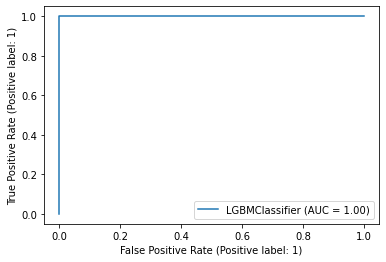

In [143]:
plot_roc_curve(clftree, X_test, y_test)

# Phase 2 : Speed Bump Detection using real world data

## Import Data

In [44]:
import pandas as pd
import numpy as np

import os

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [47]:
bumps_file_name = os.listdir('C:/Users/data/Desktop/sha/Bumps')


normal_file_name = os.listdir('C:/Users/data/Desktop/sha//normal road')

In [48]:
data = pd.read_csv("Bumps/20210713-336-52 pm-Cont.csv", header = 1)
data.head()

Time  elapsed     x-acc     y-acc     z-acc    ax-vel    ay-vel  \
0  3:36:52.00 pm     0.00  0.164955 -0.374556  0.963745 -0.018710  0.362014   
1  3:36:52.02 pm     0.02  0.145447 -0.378747  0.954490 -0.022046  0.314497   
2  3:36:52.04 pm     0.04  0.097184 -0.375435  0.879099 -0.006169  0.154523   
3  3:36:52.06 pm     0.06  0.077720 -0.377318  0.894436 -0.004006  0.018547   
4  3:36:52.08 pm     0.08  0.094653 -0.387383  0.892448  0.010529  0.009595   

     az-vel  gps-speed  gps-distance  acc-speed  acc-distance      course  \
0  0.275150   9.572339           0.0   7.917559      0.157774  147.165009   
1  0.248388   9.572339           0.0   7.947984      0.316136  147.165009   
2  0.123496   9.572339           0.0   7.971777      0.475039  147.165009   
3  0.018525   9.572339           0.0   7.988909      0.634351  147.165009   
4 -0.001036   9.572339           0.0   8.005797      0.793994  147.165009   

        lat      long      power      roll     pitch       yaw   altitude  \
0  53.81436 -1.583294  17.950889 -1.591628 -0.020444 -2.590694  73.883279   
1  53.81436 -1.583294  19.773335 -1.583799 -0.020197 -2.590861  73.883279   
2  53.81436 -1.583294  15.572606 -1.581293 -0.019820 -2.590940  73.883279   
3  53.81436 -1.583294  11.317828 -1.584720 -0.019879 -2.590870  73.883279   
4  53.81436 -1.583294  11.185579 -1.587203 -0.019920 -2.590733  73.883279   

   flags  hAccuracy   xOffset  gps-accX  gps-accY      rawX      rawY  \
0      0   4.739307 -0.987939  0.130263       0.0 -1.042687  0.042531   
1    768   4.739307 -0.985535  0.130263       0.0 -1.034911  0.036865   
2    256   4.739307 -0.986386  0.130263       0.0 -0.961242  0.034580   
3    768   4.739307 -0.990081  0.130263       0.0 -0.975039  0.021936   
4    256   4.739307 -0.992975  0.130263       0.0 -0.977705  0.041129   

       rawZ      magX      magY       magZ  baroAltitude  baroPressure  
0  0.103005  5.268581  7.075977  20.841768     80.626963    100.836517  
1  0.081026  5.266919  6.931478  20.798123     80.626963    100.836517  
2  0.030391  5.311201  6.697081  20.960867     80.626963    100.836517  
3  0.018357  5.210885  6.688252  21.106678     80.626963    100.836517  
4  0.029027  5.098820  6.819573  21.075951     80.626963    100.836517

## Data Preprocessing

In [49]:
col_names = data.columns

In [50]:
col_names

Index(['Time', 'elapsed', 'x-acc', 'y-acc', 'z-acc', 'ax-vel', 'ay-vel',
       'az-vel', 'gps-speed', 'gps-distance', 'acc-speed', 'acc-distance',
       'course', 'lat', 'long', 'power', 'roll', 'pitch', 'yaw', 'altitude',
       'flags', 'hAccuracy', 'xOffset', 'gps-accX', 'gps-accY', 'rawX', 'rawY',
       'rawZ', 'magX', 'magY', 'magZ', 'baroAltitude', 'baroPressure'],
      dtype='object')

In [51]:
bumps_df = pd.DataFrame(columns= col_names)
bumps_df

Empty DataFrame
Columns: [Time, elapsed, x-acc, y-acc, z-acc, ax-vel, ay-vel, az-vel, gps-speed, gps-distance, acc-speed, acc-distance, course, lat, long, power, roll, pitch, yaw, altitude, flags, hAccuracy, xOffset, gps-accX, gps-accY, rawX, rawY, rawZ, magX, magY, magZ, baroAltitude, baroPressure]
Index: []

In [52]:
for i in range(0, len(bumps_file_name)):
    data = pd.read_csv("Bumps/" + bumps_file_name[i], header = 1)
    data['id'] = int(i + 1)
    bumps_df = pd.concat([bumps_df, data], ignore_index=True)

In [53]:
bumps_df = bumps_df[['id', 'Time', 'x-acc', 'y-acc', 'z-acc', 'gps-speed']]

In [54]:
len(bumps_file_name)

84

In [55]:
normal_df = pd.DataFrame(columns= col_names)
normal_df

Empty DataFrame
Columns: [Time, elapsed, x-acc, y-acc, z-acc, ax-vel, ay-vel, az-vel, gps-speed, gps-distance, acc-speed, acc-distance, course, lat, long, power, roll, pitch, yaw, altitude, flags, hAccuracy, xOffset, gps-accX, gps-accY, rawX, rawY, rawZ, magX, magY, magZ, baroAltitude, baroPressure]
Index: []

In [56]:
for i in range(0, len(normal_file_name)):
    data = pd.read_csv("normal road/" + normal_file_name[i], header = 1)
    data['id'] = int(84 + i + 1)
    normal_df = pd.concat([normal_df, data], ignore_index=True)

In [57]:
normal_df = normal_df[['id', 'Time', 'x-acc', 'y-acc', 'z-acc', 'gps-speed']]

In [58]:
master_df = pd.concat([bumps_df, normal_df], ignore_index=True)

In [59]:
master_df

id           Time     x-acc     y-acc     z-acc  gps-speed
0        1.0  3:06:31.00 pm  0.422297 -0.019161 -0.913826   0.000000
1        1.0  3:06:31.02 pm  0.403117 -0.005946 -0.902797   0.000000
2        1.0  3:06:31.04 pm  0.418899  0.000899 -0.899642   0.000000
3        1.0  3:06:31.06 pm  0.454297 -0.025840 -0.909481   0.000000
4        1.0  3:06:31.08 pm  0.424886  0.026179 -0.872650   0.000000
...      ...            ...       ...       ...       ...        ...
34427  108.0  4:08:36.86 pm -0.082573  0.045030  0.951826   4.798512
34428  108.0  4:08:36.88 pm -0.092111  0.047553  0.959941   4.798512
34429  108.0  4:08:36.90 pm -0.074466  0.035863  1.007244   4.798512
34430  108.0  4:08:36.92 pm -0.083928  0.034097  0.978299   4.798512
34431  108.0  4:08:36.94 pm -0.082894  0.032784  0.939096   4.798512

[34432 rows x 6 columns]

In [60]:
len(normal_file_name)

24

In [61]:
y_series_bump = [True for i in range(0,85)]
y_series_normal = [False for i in range(0,24)]

In [62]:
y = y_series_bump + y_series_normal
y = pd.Series(y)
y = y[1:]

## Feature Engineering

In [63]:
from tsfresh import extract_features
extracted_features = extract_features(master_df, column_id="id", column_sort="Time")

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 20/20 [01:06<00:00,  3.32s/it]


In [64]:
extracted_features.columns

Index(['x-acc__variance_larger_than_standard_deviation',
       'x-acc__has_duplicate_max', 'x-acc__has_duplicate_min',
       'x-acc__has_duplicate', 'x-acc__sum_values', 'x-acc__abs_energy',
       'x-acc__mean_abs_change', 'x-acc__mean_change',
       'x-acc__mean_second_derivative_central', 'x-acc__median',
       ...
       'gps-speed__permutation_entropy__dimension_5__tau_1',
       'gps-speed__permutation_entropy__dimension_6__tau_1',
       'gps-speed__permutation_entropy__dimension_7__tau_1',
       'gps-speed__query_similarity_count__query_None__threshold_0.0',
       'gps-speed__matrix_profile__feature_"min"__threshold_0.98',
       'gps-speed__matrix_profile__feature_"max"__threshold_0.98',
       'gps-speed__matrix_profile__feature_"mean"__threshold_0.98',
       'gps-speed__matrix_profile__feature_"median"__threshold_0.98',
       'gps-speed__matrix_profile__feature_"25"__threshold_0.98',
       'gps-speed__matrix_profile__feature_"75"__threshold_0.98'],
      dtype='obje

In [65]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(extracted_features)
features_filtered = select_features(extracted_features, y)

C:\Users\data\anaconda3\lib\site-packages\tsfresh\utilities\dataframe_functions.py:171: RuntimeWarning: The columns ['x-acc__query_similarity_count__query_None__threshold_0.0'
 'y-acc__query_similarity_count__query_None__threshold_0.0'
 'z-acc__query_similarity_count__query_None__threshold_0.0'
 'gps-speed__friedrich_coefficients__coeff_0__m_3__r_30'
 'gps-speed__friedrich_coefficients__coeff_1__m_3__r_30'
 'gps-speed__friedrich_coefficients__coeff_2__m_3__r_30'
 'gps-speed__friedrich_coefficients__coeff_3__m_3__r_30'
 'gps-speed__max_langevin_fixed_point__m_3__r_30'
 'gps-speed__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn("The columns {} did not have any finite values. Filling with zeros.".format(


In [66]:
features_filtered.columns

Index(['y-acc__fft_coefficient__attr_"abs"__coeff_4',
       'y-acc__autocorrelation__lag_5',
       'y-acc__fft_coefficient__attr_"abs"__coeff_5',
       'x-acc__ar_coefficient__coeff_1__k_10',
       'y-acc__approximate_entropy__m_2__r_0.1',
       'y-acc__autocorrelation__lag_4',
       'x-acc__permutation_entropy__dimension_6__tau_1',
       'y-acc__fft_coefficient__attr_"abs"__coeff_2',
       'y-acc__lempel_ziv_complexity__bins_3', 'y-acc__autocorrelation__lag_7',
       'y-acc__lempel_ziv_complexity__bins_10',
       'z-acc__ar_coefficient__coeff_4__k_10',
       'x-acc__permutation_entropy__dimension_5__tau_1',
       'y-acc__approximate_entropy__m_2__r_0.7',
       'y-acc__partial_autocorrelation__lag_8',
       'y-acc__fourier_entropy__bins_100',
       'x-acc__agg_linear_trend__attr_"stderr"__chunk_len_10__f_agg_"var"',
       'y-acc__longest_strike_below_mean',
       'y-acc__approximate_entropy__m_2__r_0.9',
       'y-acc__autocorrelation__lag_6', 'y-acc__autocorrelation__

In [67]:
len(features_filtered.columns)

48

## ML model building

In [68]:
features_filtered.head()

y-acc__fft_coefficient__attr_"abs"__coeff_4  \
1.0                                     0.025413   
2.0                                     0.623783   
3.0                                     1.688661   
4.0                                     1.910928   
5.0                                     1.673774   

     y-acc__autocorrelation__lag_5  \
1.0                       0.533996   
2.0                       0.214045   
3.0                       0.525425   
4.0                       0.492853   
5.0                       0.351916   

     y-acc__fft_coefficient__attr_"abs"__coeff_5  \
1.0                                     0.049054   
2.0                                     1.354125   
3.0                                     1.052468   
4.0                                     2.913502   
5.0                                     4.102592   

     x-acc__ar_coefficient__coeff_1__k_10  \
1.0                              0.407941   
2.0                              1.258862   
3.0                              1.680647   
4.0                              1.434043   
5.0                              1.880258   

     y-acc__approximate_entropy__m_2__r_0.1  y-acc__autocorrelation__lag_4  \
1.0                                0.748494                      -0.144487   
2.0                                0.723644                       0.308991   
3.0                                0.660169                       0.574892   
4.0                                0.592128                       0.531643   
5.0                                0.605551                       0.485559   

     x-acc__permutation_entropy__dimension_6__tau_1  \
1.0                                        3.989643   
2.0                                        4.870257   
3.0                                        4.788943   
4.0                                        4.642002   
5.0                                        4.363503   

     y-acc__fft_coefficient__attr_"abs"__coeff_2  \
1.0                                     0.070918   
2.0                                     1.198141   
3.0                                     3.242086   
4.0                                     3.626943   
5.0                                     0.780486   

     y-acc__lempel_ziv_complexity__bins_3  y-acc__autocorrelation__lag_7  \
1.0                              0.179054                       0.982179   
2.0                              0.198630                      -0.053100   
3.0                              0.160839                       0.362557   
4.0                              0.186047                       0.345003   
5.0                              0.217877                       0.056940   

     y-acc__lempel_ziv_complexity__bins_10  \
1.0                               0.358108   
2.0                               0.315068   
3.0                               0.342657   
4.0                               0.353488   
5.0                               0.385475   

     z-acc__ar_coefficient__coeff_4__k_10  \
1.0                              0.218611   
2.0                              0.428432   
3.0                              0.386295   
4.0                              0.566264   
5.0                              0.341216   

     x-acc__permutation_entropy__dimension_5__tau_1  \
1.0                                        3.316895   
2.0                                        3.871340   
3.0                                        3.766977   
4.0                                        3.598131   
5.0                                        3.412274   

     y-acc__approximate_entropy__m_2__r_0.7  \
1.0                                0.330051   
2.0                                0.609565   
3.0                                0.548282   
4.0                                0.465877   
5.0                                0.432077   

     y-acc__partial_autocorrelation__lag_8  y-acc__fourier_entropy__bins_100  \
1.0                              -0.624727                         

In [69]:
import re
features_filtered = features_filtered.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_filtered, y, test_size=0.3, random_state=42)

In [71]:
# pip install lightgbm

In [72]:
from   sklearn.metrics import confusion_matrix , classification_report, accuracy_score, roc_auc_score, plot_roc_curve, precision_recall_curve, plot_precision_recall_curve
from   lightgbm import LGBMClassifier

In [73]:
#storing the Decision tree classifier into clftree
clftree = LGBMClassifier(random_state=0)

In [74]:
#Fitting the model into clftree variable
clftree.fit(X_train, y_train)

LGBMClassifier(random_state=0)

## ML Model Evaluation

In [75]:
# Prediction
y_pred_lgbc = clftree.predict(X_test)

In [76]:
y_pred_lgbc

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True, False,  True,  True,  True,
       False,  True,  True,  True, False,  True])

In [77]:
from sklearn.metrics import confusion_matrix , classification_report, accuracy_score, roc_auc_score, plot_roc_curve, precision_recall_curve, plot_precision_recall_curve

In [78]:
print("\n Confusion Matrix : \n",accuracy_score(y_test, y_pred_lgbc))


 Confusion Matrix : 
 0.8484848484848485


In [79]:
print("\n Confusion Matrix : \n",confusion_matrix(y_test, y_pred_lgbc))
print("\n Classification Report : \n",classification_report(y_test, y_pred_lgbc))


 Confusion Matrix : 
 [[ 3  2]
 [ 3 25]]

 Classification Report : 
               precision    recall  f1-score   support

       False       0.50      0.60      0.55         5
        True       0.93      0.89      0.91        28

    accuracy                           0.85        33
   macro avg       0.71      0.75      0.73        33
weighted avg       0.86      0.85      0.85        33



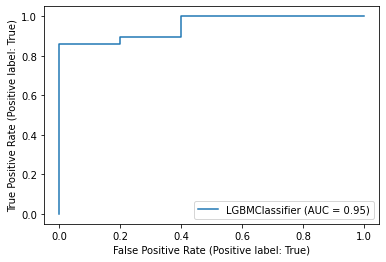

In [80]:
plot_roc_curve(clftree, X_test, y_test)

## Handle the problem of Class Imbalance

In [81]:
from   imblearn.over_sampling import RandomOverSampler

In [91]:
# random over sampler
ros = RandomOverSampler(random_state=500)
X_train_ros, y_train_ros = ros.fit_resample(features_filtered, y)
y_train_ros.value_counts()

True     84
False    84
dtype: int64

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_ros, y_train_ros, test_size=0.4, random_state=42)

In [93]:
#storing the Decision tree classifier into clftree
clftree = LGBMClassifier(random_state=0)

In [94]:
#Fitting the model into clftree variable
clftree.fit(X_train, y_train)

LGBMClassifier(random_state=0)

In [95]:
clftree.score(X_test,y_test)

0.9558823529411765

In [96]:
# Prediction
y_pred_lgbc = clftree.predict(X_test)

In [97]:
from sklearn.metrics import confusion_matrix , classification_report, accuracy_score, roc_auc_score, plot_roc_curve, precision_recall_curve, plot_precision_recall_curve

In [98]:
print("\n Confusion Matrix : \n",confusion_matrix(y_test, y_pred_lgbc))
print("\n Classification Report : \n",classification_report(y_test, y_pred_lgbc))


 Confusion Matrix : 
 [[32  0]
 [ 3 33]]

 Classification Report : 
               precision    recall  f1-score   support

       False       0.91      1.00      0.96        32
        True       1.00      0.92      0.96        36

    accuracy                           0.96        68
   macro avg       0.96      0.96      0.96        68
weighted avg       0.96      0.96      0.96        68



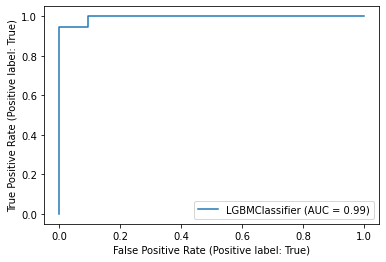

In [99]:
plot_roc_curve(clftree, X_test, y_test)